# Data preparation

In this notebook, I will prepare the data for exploration, taking the following steps:
* Load bicycle count data from the City of Vancouver website
* Inspect the bicycle count data and choose a target variable
* Load weather data from the Government of Canada website
* Combine the bicycle and weather data into a single data frame
* Save the dataframe to a .csv file

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Bicycle count data

The data from these counters was obtained from the [City of Vancouver website](https://vancouver.ca/streets-transportation/how-we-collect-bike-volumes.aspx). 

Some details about the data are provided on the website:<br> 
_The automated counters provide continuous, hourly bike volumes for each direction of the bike lane. The hourly volumes in each direction are totaled to provide a daily volume. For current data (August 2018 to present), a constant value site correction factor is applied to account for consistent counter errors relating to things like cyclist density, material of the bike wheels and frame, cyclist behavior, and sensor sensitivity._

### Load the data

In [2]:
# load the bicycle count data into a pandas data frame
url_counts = "https://vancouver.ca/files/cov/bike-volume-data.xlsx"
bikes_raw = pd.read_excel(url_counts, sheet_name='City of Vancouver Bike Data', index_col='Date')

### Take a look at the data structure

In [3]:
# show the first 5 rows
bikes_raw.head()

,Burrard at Cornwall,Canada Line Bridge at West Kent,Comox at Thurlow,Dunsmuir Viaduct,East 10th at Clark,Hornby and Robson,Lions Gate Bridge at Spirit Trail,Ontario and 11th,Point Grey at Stephens,Point Grey at Volunteer Park,Seawall 2nd Beach Pool,Seawall at Creekside Community Centre,Seawall at David Lam Park,Seawall at Harbour Green Park,Seawall at HMS Discovery,Seawall at Science World,Smithe at Expo,Stephens at Point Grey,Union at Hawks
Date,,,,,,,,,,,,,,,,,,,
2018-08-01,8583.75,906.84,1338.59,3460.80,2738.88,3599.44,2631.18,2527,3380.85,4162.14,5165.15,0.0,5274.36,3581.28,5307.84,8789.04,1479.25,1043.04,5385.69
2018-08-02,6882.71,885.06,1023.11,3095.15,2511.00,3039.92,2274.28,2261,2385.90,2995.92,5043.55,0.0,3845.60,3183.80,5174.95,7678.32,1401.65,840.58,4797.09
2018-08-03,5504.33,683.10,870.91,2484.36,2086.56,2574.00,1671.92,1949,1970.10,2305.08,4692.05,0.0,3404.92,2824.18,4807.32,6686.16,1191.16,619.04,3745.24
2018-08-04,7212.95,1027.62,1016.33,1461.57,1888.92,1939.60,2747.52,1881,4112.46,4564.56,7987.60,0.0,6812.60,4554.02,7986.01,8418.80,650.87,835.28,3604.63
2018-08-05,6938.71,849.42,935.97,1405.95,1452.60,1680.64,2259.94,1598,3717.45,4343.40,6544.55,0.0,6527.40,4341.22,6561.08,7686.64,631.47,849.06,3327.77


Each column shows a different counter location, with the counts starting on August 1st, 2018.

In [4]:
# clean up the column names: 
# remove whitespace and special characters, and replace spaces with underscores
bikes_raw.columns = bikes_raw.columns.str.strip().str.replace('[^A-Za-z0-9_ ]', '').str.replace(' ', '_')

In [5]:
# get information about the dataframe
bikes_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 884 entries, 2018-08-01 to 2020-12-31
Data columns (total 19 columns):
Burrard_at_Cornwall                      884 non-null float64
Canada_Line_Bridge_at_West_Kent          884 non-null float64
Comox_at_Thurlow                         884 non-null float64
Dunsmuir_Viaduct                         884 non-null float64
East_10th_at_Clark                       884 non-null float64
Hornby_and_Robson                        884 non-null float64
Lions_Gate_Bridge_at_Spirit_Trail        884 non-null float64
Ontario_and_11th                         884 non-null int64
Point_Grey_at_Stephens                   884 non-null float64
Point_Grey_at_Volunteer_Park             884 non-null float64
Seawall_2nd_Beach_Pool                   884 non-null float64
Seawall_at_Creekside_Community_Centre    884 non-null float64
Seawall_at_David_Lam_Park                884 non-null float64
Seawall_at_Harbour_Green_Park            884 non-null float64
Seawall_at

There are 884 rows with bike counts at 19 locations between August 1st 2018 and December 31st 2020. Most bike counts are of 'float' data type, except the counts from 'Ontario and 11th', which are stored as integers. This location has a correction factor of exactly 1.

In [6]:
# look at some descriptive statistics
bikes_raw.describe() 

,Burrard_at_Cornwall,Canada_Line_Bridge_at_West_Kent,Comox_at_Thurlow,Dunsmuir_Viaduct,East_10th_at_Clark,Hornby_and_Robson,Lions_Gate_Bridge_at_Spirit_Trail,Ontario_and_11th,Point_Grey_at_Stephens,Point_Grey_at_Volunteer_Park,Seawall_2nd_Beach_Pool,Seawall_at_Creekside_Community_Centre,Seawall_at_David_Lam_Park,Seawall_at_Harbour_Green_Park,Seawall_at_HMS_Discovery,Seawall_at_Science_World,Smithe_at_Expo,Stephens_at_Point_Grey,Union_at_Hawks
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,3783.154140,543.767579,539.054853,1430.470758,1403.637149,1357.475294,1156.129751,1089.911765,1636.558473,2074.778077,1361.441346,1936.188281,2243.587557,1223.697036,1486.222149,4133.116471,1045.918959,546.522330,2598.620419
std,2123.409384,407.302021,249.749307,832.712450,860.857323,820.621150,772.763696,813.292060,1389.202104,1697.311080,1845.171890,1966.091373,1927.385338,1018.506753,1790.406374,2410.090801,746.690492,377.602616,1300.012687
min,121.450000,0.000000,13.110000,0.000000,0.000000,0.000000,28.980000,0.000000,16.830000,29.640000,0.000000,0.000000,0.000000,0.000000,9.700000,0.000000,27.160000,7.420000,106.820000
25%,2031.635000,202.455000,336.797500,756.792500,762.210000,718.120000,563.845000,380.750000,534.600000,761.520000,53.912500,0.000000,656.880000,387.580000,171.205000,2206.880000,454.930000,239.560000,1568.237500
50%,3437.230000,469.260000,498.335000,1291.105000,1410.480000,1262.560000,1010.110000,1042.000000,1195.920000,1533.870000,432.250000,1341.785000,1604.020000,953.670000,701.310000,3722.680000,892.885000,449.440000,2450.865000
75%,5501.997500,841.500000,729.212500,1920.177500,2086.560000,1968.720000,1624.695000,1773.750000,2485.395000,3110.205000,2056.512500,3365.067500,3625.260000,1852.825000,2173.285000,5955.040000,1405.530000,811.960000,3612.532500
max,10287.550000,2229.480000,1338.590000,3487.580000,3333.960000,3599.440000,5290.520000,2794.000000,7904.160000,10124.340000,8252.650000,8911.230000,9269.000000,4554.020000,7986.010000,10505.040000,3434.770000,2108.340000,5465.260000


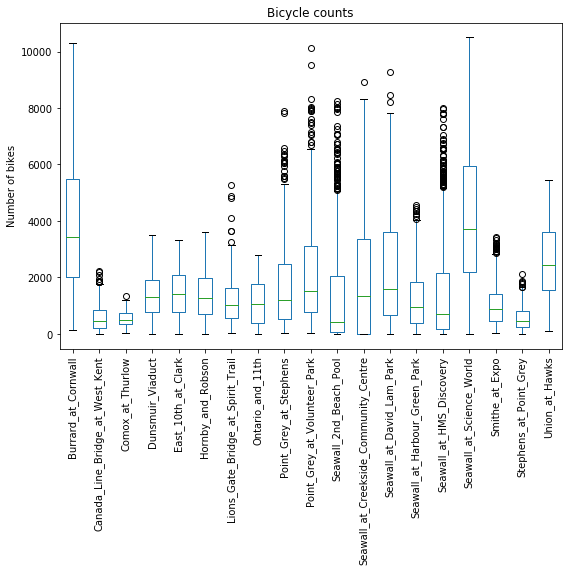

In [7]:
# create a boxplot with the counts at each location
ax = bikes_raw.boxplot(figsize=(9,6), grid=False, rot=90)
ax.set_ylabel('Number of bikes')
ax.set_title('Bicycle counts');

* The mean daily bike count varies between a couple hundred and a couple thousand bikes across counters. 
* All columns have a count of 884. However, some of the minimum counts are zero. This might indicate a problem with the counter rather than a lack of cyclists.

### Take a look at potential missing values

In [8]:
# let's look at how many zero values there are for each counter
(bikes_raw==0).sum().sort_values(ascending=False)

Seawall_at_Creekside_Community_Centre    241
Seawall_2nd_Beach_Pool                   177
Ontario_and_11th                         171
East_10th_at_Clark                       100
Seawall_at_David_Lam_Park                 57
Seawall_at_Harbour_Green_Park             50
Hornby_and_Robson                         32
Canada_Line_Bridge_at_West_Kent           20
Dunsmuir_Viaduct                           9
Seawall_at_Science_World                   5
Union_at_Hawks                             0
Comox_at_Thurlow                           0
Point_Grey_at_Volunteer_Park               0
Lions_Gate_Bridge_at_Spirit_Trail          0
Point_Grey_at_Stephens                     0
Stephens_at_Point_Grey                     0
Seawall_at_HMS_Discovery                   0
Smithe_at_Expo                             0
Burrard_at_Cornwall                        0
dtype: int64

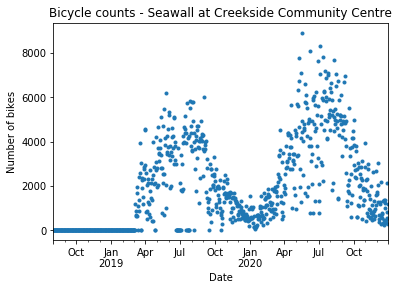

In [9]:
# plot the counts for the counter with the most zeros: Seawall at Creekside Community Centre
ax = bikes_raw['Seawall_at_Creekside_Community_Centre'].plot(kind='line', style='.')
ax.set_ylabel('Number of bikes')
ax.set_title('Bicycle counts - Seawall at Creekside Community Centre');

This looks like zeros are missing data. The counter wasn't counting any bikes before April 2019.

### Select the data to keep

In [10]:
# for now, keep it simple and remove the columns with missing data
bikes = bikes_raw.replace(0, np.nan).dropna(axis=1)

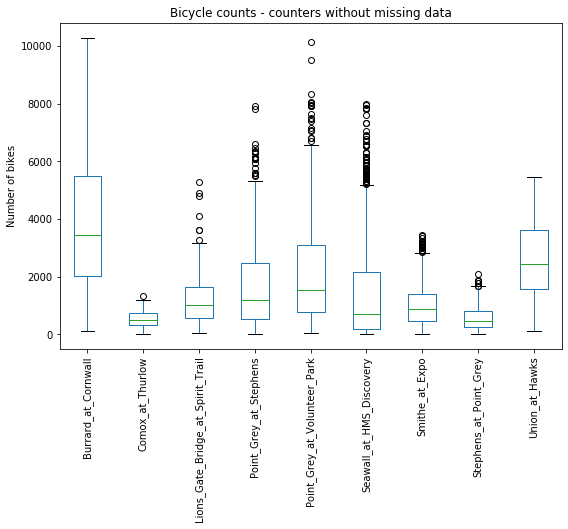

In [11]:
# re-create the boxplot
ax = bikes.boxplot(figsize=(9,6), grid=False, rot=90)
ax.set_ylabel('Number of bikes')
ax.set_title('Bicycle counts - counters without missing data');

In [12]:
# get the mean counts for all counters with valid data
bikes.mean().sort_values(ascending=False)

Burrard_at_Cornwall                  3783.154140
Union_at_Hawks                       2598.620419
Point_Grey_at_Volunteer_Park         2074.778077
Point_Grey_at_Stephens               1636.558473
Seawall_at_HMS_Discovery             1486.222149
Lions_Gate_Bridge_at_Spirit_Trail    1156.129751
Smithe_at_Expo                       1045.918959
Stephens_at_Point_Grey                546.522330
Comox_at_Thurlow                      539.054853
dtype: float64

### Choose a target variable

In [13]:
# let's use the Burrard at Cornwall counter as the target variable for the predictions
target_col = 'Burrard_at_Cornwall'

## Weather data

The raw data can be downloaded from the [Government of Canada climate website](https://climate.weather.gc.ca/historical_data/search_historic_data_e.html), using the instructions provided in this [pdf file](https://drive.google.com/drive/folders/1WJCDEU34c60IfOnG4rv5EPZ4IhhW9vZH). Briefly, use homebrew (in the case of Mac OS X) to download csv files (one per year) for a particular weather station via the command line.

I initially looked at the Vancouver Harbour weather station data, but this data set had a lot of missing precipitation data in 2020. The Vancouver International Airport data is much more complete. The downside is that the measurements were taken a bit further away from the city.

### Load the data

In [14]:
# download the weather data using bash
! for year in `seq 2018 2020`;\
do for month in `seq 1 1`;\
do wget --content-disposition "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=51442&Year=${year}&Month=${month}&Day=14&timeframe=2&submit=Download+Data";\
done;\
done

--2021-02-24 10:58:09--  https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=51442&Year=2018&Month=1&Day=14&timeframe=2&submit=Download+Data
Resolving climate.weather.gc.ca (climate.weather.gc.ca)... 205.189.10.46
Connecting to climate.weather.gc.ca (climate.weather.gc.ca)|205.189.10.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/force-download]
Saving to: ‘en_climate_daily_BC_1108395_2018_P1D.csv’

en_climate_daily_BC     [ <=>                ]  63.62K   397KB/s    in 0.2s    

2021-02-24 10:58:10 (397 KB/s) - ‘en_climate_daily_BC_1108395_2018_P1D.csv’ saved [65144]

--2021-02-24 10:58:10--  https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=51442&Year=2019&Month=1&Day=14&timeframe=2&submit=Download+Data
Resolving climate.weather.gc.ca (climate.weather.gc.ca)... 205.189.10.46
Connecting to climate.weather.gc.ca (climate.weather.gc.ca)|205.189.10.46|:443... connected.
HTTP 

In [15]:
# get all the weather data into a single pandas dataframe
# 2018
weather_2018 = pd.read_csv('en_climate_daily_BC_1108395_2018_P1D.csv', index_col='Date/Time', parse_dates=True)
nrow,ncol = weather_2018.shape
print('The 2018 data file has', nrow, 'rows and', ncol, 'columns.')
# 2019
weather_2019 = pd.read_csv('en_climate_daily_BC_1108395_2019_P1D.csv', index_col='Date/Time', parse_dates=True)
nrow,ncol = weather_2019.shape
print('The 2019 data file has', nrow, 'rows and', ncol, 'columns.')
# 2020
weather_2020 = pd.read_csv('en_climate_daily_BC_1108395_2020_P1D.csv', index_col='Date/Time', parse_dates=True)
nrow,ncol = weather_2020.shape
print('The 2020 data file has', nrow, 'rows and', ncol, 'columns.')
# concatenate
weather = pd.concat([weather_2018,weather_2019,weather_2020])
nrow, ncol = weather.shape
print('The total raw data file has', nrow, 'rows and', ncol, 'columns.')

The 2018 data file has 365 rows and 30 columns.
The 2019 data file has 365 rows and 30 columns.
The 2020 data file has 366 rows and 30 columns.
The total raw data file has 1096 rows and 30 columns.


### Take a look at the data structure

In [16]:
# show the first 5 rows
weather.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-123.18,49.19,VANCOUVER INTL A,1108395,2018,1,1,NaN,3.0,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
2018-01-02,-123.18,49.19,VANCOUVER INTL A,1108395,2018,1,2,NaN,3.0,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
2018-01-03,-123.18,49.19,VANCOUVER INTL A,1108395,2018,1,3,NaN,4.0,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
2018-01-04,-123.18,49.19,VANCOUVER INTL A,1108395,2018,1,4,NaN,5.7,NaN,...,0.0,NaN,0.0,T,NaN,NaN,NaN,NaN,<31,NaN
2018-01-05,-123.18,49.19,VANCOUVER INTL A,1108395,2018,1,5,NaN,9.7,NaN,...,0.0,NaN,21.8,NaN,NaN,NaN,NaN,NaN,<31,NaN


In [17]:
# clean up the column names: remove whitespace and special characters, use lower case,
# and replace spaces with underscores
weather.columns = weather.columns.str.strip().str.lower().str.replace('[^A-Za-z0-9_ ]','').str.replace(' ','_')

In [18]:
# get information about the data set
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2018-01-01 to 2020-12-31
Data columns (total 30 columns):
longitude_x                1096 non-null float64
latitude_y                 1096 non-null float64
station_name               1096 non-null object
climate_id                 1096 non-null int64
year                       1096 non-null int64
month                      1096 non-null int64
day                        1096 non-null int64
data_quality               0 non-null float64
max_temp_c                 1090 non-null float64
max_temp_flag              8 non-null object
min_temp_c                 1089 non-null float64
min_temp_flag              8 non-null object
mean_temp_c                1089 non-null float64
mean_temp_flag             8 non-null object
heat_deg_days_c            1089 non-null float64
heat_deg_days_flag         8 non-null object
cool_deg_days_c            1089 non-null float64
cool_deg_days_flag         8 non-null object
total_rain_mm            

There are 1096 rows with information about the location, time of year, temperature, rain, snow, and wind. There seems to be quite a bit of missing data. Since these data will be used as features in the models, I will save further exploration processing for later.

## Combine the data

### Join the bicycle counts and weather data into a single dataframe

In [19]:
# rename the index column of the weather data to make it identical to the bike data
weather.index.names = ['Date']
# add a prefix to the column names
weather.columns = 'wx_' + weather.columns
# remove the prefix for the year, month and day columns
weather.rename(columns = {'wx_year': 'year', 'wx_month': 'month', 'wx_day': 'day'}, inplace = True)
# join the data sets
data = pd.concat([bikes[target_col], weather], axis=1, join='inner')

In [20]:
# show the first 5 rows
data.head()

,Burrard_at_Cornwall,wx_longitude_x,wx_latitude_y,wx_station_name,wx_climate_id,year,month,day,wx_data_quality,wx_max_temp_c,...,wx_total_snow_cm,wx_total_snow_flag,wx_total_precip_mm,wx_total_precip_flag,wx_snow_on_grnd_cm,wx_snow_on_grnd_flag,wx_dir_of_max_gust_10s_deg,wx_dir_of_max_gust_flag,wx_spd_of_max_gust_kmh,wx_spd_of_max_gust_flag
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-01,8583.75,-123.18,49.19,VANCOUVER INTL A,1108395,2018,8,1,NaN,22.2,...,0.0,NaN,0.0,NaN,NaN,NaN,10.0,NaN,37,NaN
2018-08-02,6882.71,-123.18,49.19,VANCOUVER INTL A,1108395,2018,8,2,NaN,22.5,...,0.0,NaN,0.0,NaN,NaN,NaN,14.0,NaN,37,NaN
2018-08-03,5504.33,-123.18,49.19,VANCOUVER INTL A,1108395,2018,8,3,NaN,23.3,...,0.0,NaN,0.0,NaN,NaN,NaN,19.0,NaN,41,NaN
2018-08-04,7212.95,-123.18,49.19,VANCOUVER INTL A,1108395,2018,8,4,NaN,22.5,...,0.0,NaN,0.0,NaN,NaN,NaN,20.0,NaN,32,NaN
2018-08-05,6938.71,-123.18,49.19,VANCOUVER INTL A,1108395,2018,8,5,NaN,25.4,...,0.0,NaN,0.0,NaN,NaN,NaN,22.0,NaN,30,NaN


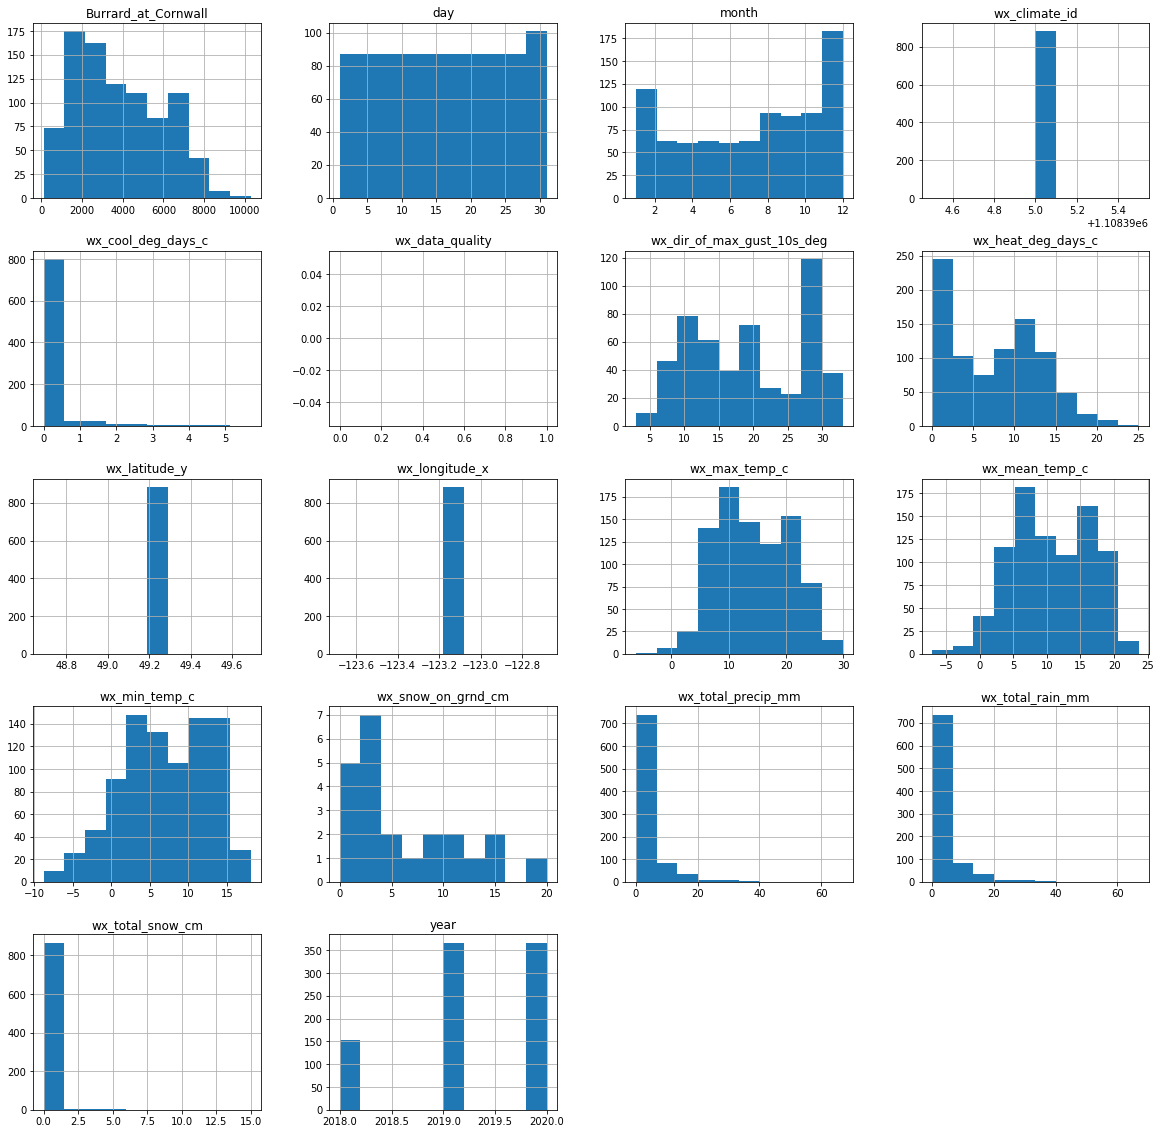

In [21]:
# plot histograms of all values
data.hist(figsize=(20,20));

### Save the dataframe to a .csv file

In [22]:
data.to_csv('raw.csv')

## What's next?

In the next notebook, I will split the data into a train and test set and explore and visualize the data.